# Mutation Up Analysis, Round02 - 06-03-2020
This Jupyter notebook will graph out the results of the second round of experiments. Previous rounds of experiments were not run correctly and the results were faulty.

In the experiments whose results are graphed below, a clonal population of a provided wild-type was evolved for 500,000 generations with an elevated mutation rate (point mutations = small insertions = small deletions = 4e-7; default (control) value = 1e-7). 

Five random seeds were used to validate the data; in all of the graphs, we graph out the *control* vs. *mutation up* condition.


## Read in the data and set up the environment

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from MyFunctions import read_fitness, read_bp, read_genes, read_robustness, perc_diff

# Laptop
INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

# Desktop
#INPUT_ROOT_DIR = "C://Users//Brian Davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"

OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//mut_up_analysis//"
WINDOW_SIZE = 10000

# Make sure that the output directories exist and create them if not
if not os.path.exists(OUTPUT_ROOT_DIR):
    os.mkdir(OUTPUT_ROOT_DIR)
if not os.path.exists(OUTPUT_ROOT_DIR + "fitness_best//perc_change"):
    os.makedirs(OUTPUT_ROOT_DIR + "fitness_best//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "bp_best//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "bp_best//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "genes_best//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "genes_best//perc_change//")
if not os.path.exists(OUTPUT_ROOT_DIR + "robustness//perc_change//"):
    os.makedirs(OUTPUT_ROOT_DIR + "robustness//perc_change//")

print("Reading in the data...")

# STAT_BP_BEST
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
# Control
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

# Mutation Up
df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

# STAT_FITNESS_BEST
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
# Control
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

# Mutation Up
df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

# STAT_GENES_BEST
genes_best_names = ['generation', 'num_coding_RNAs', 'num_non-coding_RNAs', 'avg_size_of_coding_RNAs', 'avg_size_of_non-coding_RNAs', 'num_functional_genes', 'num_non-functional_genes', 'avg_size_of_functional_genes', 'avg_size_of_non-functional_genes']

# Control
df_seed01_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed01//control//stats//stat_genes_best.out")
df_seed02_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed02//control//stats//stat_genes_best.out")
df_seed03_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed03//control//stats//stat_genes_best.out")
df_seed04_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed04//control//stats//stat_genes_best.out")
df_seed05_control_genes_best = read_genes(INPUT_ROOT_DIR + "seed05//control//stats//stat_genes_best.out")

# Mutation Up
df_seed01_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_genes_best.out")
df_seed02_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_genes_best.out")
df_seed03_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_genes_best.out")
df_seed04_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_genes_best.out")
df_seed05_mutation_up_genes_best = read_genes(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_genes_best.out")

# ROBUSTNESS

# Control
df_seed01_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//control//seed01_control_ancestor_robustness.out")
df_seed02_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//control//seed02_control_ancestor_robustness.out")
df_seed03_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//control//seed03_control_ancestor_robustness.out")
df_seed04_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//control//seed04_control_ancestor_robustness.out")
df_seed05_control_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//control//seed05_control_ancestor_robustness.out")

# Mutation Up
df_seed01_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed01//mut_up//seed01_mutation_up_ancestor_robustness.out")
df_seed02_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed02//mut_up//seed02_mutation_up_ancestor_robustness.out")
df_seed03_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed03//mut_up//seed03_mutation_up_ancestor_robustness.out")
df_seed04_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed04//mut_up//seed04_mutation_up_ancestor_robustness.out")
df_seed05_mutation_up_robustness = read_robustness(INPUT_ROOT_DIR + "seed05//mut_up//seed05_mutation_up_ancestor_robustness.out")

print("Done.")


Reading in the data...
Done.


## Graph stat_fitness_best

In [2]:
print("Graphing fitness_best...")

invalid_fitness_names = ["generation", "amt_compound_present", "parents_secretion_error", "pop_size", "secretion_error", "secretion_fitness"]
for col_header in fitness_best_names:
    if col_header in invalid_fitness_names: 
        continue
    else:
        # CREATE NEW FIGURES
        
        # Raw Data figure
        fig_fitness = plt.figure(figsize=(30,20))
        ax_fitness = fig_fitness.add_subplot(111)
        ax_fitness.set_title(col_header, fontsize=32)
        ax_fitness.set_xlabel("Generation", fontsize=20)
        ax_fitness.set_ylabel(col_header, fontsize=20)
        
        # Percent Change figure
        fig_perc_change = plt.figure(figsize=(30,20))
        ax_perc_change = fig_perc_change.add_subplot(111)
        ax_perc_change.set_title("Percent Change in " + col_header + " - Mutation Up vs. Control\n", fontsize=32)
        ax_perc_change.set_xlabel("Generation", fontsize=20)
        ax_perc_change.set_ylabel("Percent Change", fontsize=20)
        
        
        # GRAPH RAW DATA
        
        # seed01 control
        df_tmp1 = df_seed01_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_fitness)
                      
        # seed02 control
        df_tmp2 = df_seed02_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_fitness)
        
        # seed03 control
        df_tmp3 = df_seed03_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_fitness)
        
        # seed04 control
        df_tmp4 = df_seed04_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_fitness)
        
        # seed05 control
        df_tmp5 = df_seed05_control_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_fitness)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_fitness)
        
        # seed02 mutation_up
        df_tmp7 = df_seed02_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mut_up", ax=ax_fitness)
        
        # seed03 mutation_up
        df_tmp8 = df_seed03_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mut_up", ax=ax_fitness)
        
        # seed04 mutation_up
        df_tmp9 = df_seed04_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mut_up", ax=ax_fitness)
        
        # seed05 mutation_up
        df_tmp10 = df_seed05_mutation_up_fitness_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mut_up", ax=ax_fitness)
        fig_fitness.savefig(OUTPUT_ROOT_DIR + "fitness_best//fitness_" + col_header+".png")
        plt.close(fig_fitness)
        
        # Plot the percent change
        df_perc_change = pd.DataFrame(df_seed01_control_fitness_best['generation'])
        df_perc_change['seed01'] = 100*perc_diff(df_seed01_mutation_up_fitness_best[[col_header]].copy(), df_seed01_control_fitness_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed02'] = 100*perc_diff(df_seed02_mutation_up_fitness_best[[col_header]].copy(), df_seed02_control_fitness_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed03'] = 100*perc_diff(df_seed03_mutation_up_fitness_best[[col_header]].copy(), df_seed03_control_fitness_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed04'] = 100*perc_diff(df_seed04_mutation_up_fitness_best[[col_header]].copy(), df_seed04_control_fitness_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed05'] = 100*perc_diff(df_seed05_mutation_up_fitness_best[[col_header]].copy(), df_seed05_control_fitness_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        
        df_perc_change.plot(x='generation', y='seed01', label='seed01', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed02', label='seed02', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed03', label='seed03', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed04', label='seed04', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed05', label='seed05', ax=ax_perc_change)
        
        # Save the percent change figure
        fig_perc_change.savefig(OUTPUT_ROOT_DIR + "fitness_best//perc_change//perc_change_fitness_"+col_header+".png")
        plt.close(fig_perc_change)
        
        
        # Clean up
        del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10, df_perc_change


plt.close('all')
print("\nDone with fitness_best\n") 

Graphing fitness_best...

Done with fitness_best



## Graph stat_bp_best

In [3]:
print("Graphing bp_best...")
invalid_bp_best_names = ["generation", "amt_compound_present", "parents_secretion_error", "pop_size", "secretion_error"]
for col_header in bp_best_names:
    if col_header in invalid_bp_best_names:
        continue
    else:
        # CREATE NEW FIGURES
        
        # Raw data figure
        fig_bp_best = plt.figure(figsize=(30,20))
        ax_bp_best = fig_bp_best.add_subplot(111)
        ax_bp_best.set_title(col_header, fontsize=32)
        ax_bp_best.set_xlabel("Generation", fontsize=20)
        ax_bp_best.set_ylabel(col_header, fontsize=20)
        
        # Percent Change figure
        fig_perc_change = plt.figure(figsize=(30,20))
        ax_perc_change = fig_perc_change.add_subplot(111)
        ax_perc_change.set_title("Percent Change in " + col_header + " - Mutation Up vs. Control\n", fontsize=32)
        ax_perc_change.set_xlabel("Generation", fontsize=20)
        ax_perc_change.set_ylabel("Percent Change", fontsize=20)
        
        # GRAPH RAW DATA
        
        # seed01 control
        df_tmp1 = df_seed01_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_bp_best)
        
        # seed02 control
        df_tmp2 = df_seed02_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_bp_best)
        
        # seed03 control
        df_tmp3 = df_seed03_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_bp_best)
        
        # seed04 control
        df_tmp4 = df_seed04_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_bp_best)
        
        # seed05 control
        df_tmp5 = df_seed05_control_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_bp_best)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_bp_best)
        
        # seed02 mutation up
        df_tmp7 = df_seed02_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mut_up", ax=ax_bp_best)
        
        # seed03 mutation up
        df_tmp8 = df_seed03_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mut_up", ax=ax_bp_best)
        
        # seed04 mutation up
        df_tmp9 = df_seed04_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mut_up", ax=ax_bp_best)
        
        # seed05 mutation up
        df_tmp10 = df_seed05_mutation_up_bp_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mut_up", ax=ax_bp_best)
        
        # Save the raw data figure
        fig_bp_best.savefig(OUTPUT_ROOT_DIR + "bp_best//bp_best_"+col_header+".png")
        plt.close(fig_bp_best)
        
        # Plot the percent change
        df_perc_change = pd.DataFrame(df_seed01_control_bp_best['generation'])
        df_perc_change['seed01'] = 100*perc_diff(df_seed01_mutation_up_bp_best[[col_header]].copy(), df_seed01_control_bp_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed02'] = 100*perc_diff(df_seed02_mutation_up_bp_best[[col_header]].copy(), df_seed02_control_bp_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed03'] = 100*perc_diff(df_seed03_mutation_up_bp_best[[col_header]].copy(), df_seed03_control_bp_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed04'] = 100*perc_diff(df_seed04_mutation_up_bp_best[[col_header]].copy(), df_seed04_control_bp_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed05'] = 100*perc_diff(df_seed05_mutation_up_bp_best[[col_header]].copy(), df_seed05_control_bp_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        
        df_perc_change.plot(x='generation', y='seed01', label='seed01', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed02', label='seed02', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed03', label='seed03', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed04', label='seed04', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed05', label='seed05', ax=ax_perc_change)
        
        # Save the percent change figure
        fig_perc_change.savefig(OUTPUT_ROOT_DIR + "bp_best//perc_change//perc_change_bp_best_"+col_header+".png")
        plt.close(fig_perc_change)
        
        
        # Clean up
        del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10, df_perc_change


plt.close('all')
print("done with bp_best")


Graphing bp_best...
done with bp_best


## Graph stat_genes_best

In [4]:
print("Graphing genes_best...")
for col_header in genes_best_names:
    if col_header == "generation":
        continue
    else:
        # CREATE NEW FIGURES
        
        # Raw data figure
        fig_genes_best = plt.figure(figsize=(30,20))
        ax_genes_best = fig_genes_best.add_subplot(111)
        ax_genes_best.set_title(col_header, fontsize=32)
        ax_genes_best.set_xlabel("Generation", fontsize=20)
        ax_genes_best.set_ylabel(col_header, fontsize=20)
        
        # Percent Change figure
        fig_perc_change = plt.figure(figsize=(30,20))
        ax_perc_change = fig_perc_change.add_subplot(111)
        ax_perc_change.set_title("Percent Change in " + col_header + " - Mutation Up vs. Control\n", fontsize=32)
        ax_perc_change.set_xlabel("Generation", fontsize=20)
        ax_perc_change.set_ylabel("Percent Change", fontsize=20)
        
        # GRAPH RAW DATA
        
        # seed01 control
        df_tmp1 = df_seed01_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, label="seed01_control", ax=ax_genes_best)
        
        # seed02 control
        df_tmp2 = df_seed02_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, label="seed02_control", ax=ax_genes_best)
        
        # seed03 control
        df_tmp3 = df_seed03_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, label="seed03_control", ax=ax_genes_best)
        
        # seed04 control
        df_tmp4 = df_seed04_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, label="seed04_control", ax=ax_genes_best)
        
        # seed05 control
        df_tmp5 = df_seed05_control_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp5.plot(x='generation', y=col_header, label="seed05_control", ax=ax_genes_best)
        
        # seed01 mutation up
        df_tmp6 = df_seed01_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, linestyle='dashed', label="seed01_mutation_up", ax=ax_genes_best)
        
        # seed02 mutation up
        df_tmp7 = df_seed02_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, linestyle='dashed', label="seed02_mutation_up", ax=ax_genes_best)
        
        # seed03 mutation up
        df_tmp8 = df_seed03_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, linestyle='dashed', label="seed03_mutation_up", ax=ax_genes_best)
        
        # seed04 mutation up
        df_tmp9 = df_seed04_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp9.plot(x='generation', y=col_header, linestyle='dashed', label="seed04_mutation_up", ax=ax_genes_best)
        
        # seed05 mutation up
        df_tmp10 = df_seed05_mutation_up_genes_best[['generation', col_header]].copy().rolling(WINDOW_SIZE).mean()
        df_tmp10.plot(x='generation', y=col_header, linestyle='dashed', label="seed05_mutation_up", ax=ax_genes_best)
        
        # Save the raw data figure
        fig_genes_best.savefig(OUTPUT_ROOT_DIR + "genes_best//genes_best_"+col_header+".png")
        plt.close(fig_genes_best)
        
        # Plot the percent change
        df_perc_change = pd.DataFrame(df_seed01_control_genes_best['generation'])
        df_perc_change['seed01'] = 100*perc_diff(df_seed01_mutation_up_genes_best[[col_header]].copy(), df_seed01_control_genes_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed02'] = 100*perc_diff(df_seed02_mutation_up_genes_best[[col_header]].copy(), df_seed02_control_genes_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed03'] = 100*perc_diff(df_seed03_mutation_up_genes_best[[col_header]].copy(), df_seed03_control_genes_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed04'] = 100*perc_diff(df_seed04_mutation_up_genes_best[[col_header]].copy(), df_seed04_control_genes_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        df_perc_change['seed05'] = 100*perc_diff(df_seed05_mutation_up_genes_best[[col_header]].copy(), df_seed05_control_genes_best[[col_header]].copy()).rolling(WINDOW_SIZE).mean()
        
        df_perc_change.plot(x='generation', y='seed01', label='seed01', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed02', label='seed02', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed03', label='seed03', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed04', label='seed04', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed05', label='seed05', ax=ax_perc_change)
        
        # Save the percent change figure
        fig_perc_change.savefig(OUTPUT_ROOT_DIR + "genes_best//perc_change//perc_change_genes_best_"+col_header+".png")
        plt.close(fig_perc_change)
        
        # Clean up
        del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10, df_perc_change


plt.close('all')        
print("done with genes_best")

Graphing genes_best...
done with genes_best


## Graph ancestor_robustness for lineage of best individual at generation 500,000

In [6]:
print("Graphing ancestor_robustness...")
ROBUSTNESS_WINDOW_SIZE = 250
robustness_names = ['generation', 'frac_positive_offspring', 'frac_neutral_offspring', 'frac_neutral_mutants', 'frac_negative_offspring', 'cumul_delta-gap_positive_offspring', 'cumul_delta-gap_negative_offspring', 'delta-gap_best_offspring', 'delta-gap_worst_offspring', 'cumul_delta-fitness_positive_offspring', 'cumul_delta-fitness_negative_offspring', 'delta-fitness_best_offspring', 'delta-fitness_worst_offspring']
robustness_invalid_names = ['generation', 'cumul_delta-fitness_positive_offspring', 'cumul_delta-gap_positive_offspring'] # columns to ignore
#print(df_seed01_control_robustness)

for col_header in robustness_names:
    if col_header in robustness_invalid_names:
        continue
    else:
        # CREATE NEW FIGURES
        
        # Create raw data figure
        fig_ancestor_robustness = plt.figure(figsize=(30,20))
        ax_ancestor_robustness = fig_ancestor_robustness.add_subplot(111)
        ax_ancestor_robustness.set_title("Robustness - Mutation Up vs. Control\n" + col_header, fontsize=32)
        ax_ancestor_robustness.set_xlabel("Generation", fontsize=20)
        ax_ancestor_robustness.set_ylabel(col_header, fontsize=20)
        
        # Create percent change figure
        fig_perc_change = plt.figure(figsize=(30,20))
        ax_perc_change = fig_perc_change.add_subplot(111)
        ax_perc_change.set_title("Percent Change in " + col_header + " - Mutation Up vs. Control\n", fontsize=32)
        ax_perc_change.set_xlabel("Generation", fontsize=20)
        ax_perc_change.set_ylabel("Percent Change", fontsize=20)
        
        # GRAPH RAW DATA
        
        # seed01 control
        df_tmp1 = df_seed01_control_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp1.plot(x='generation', y=col_header, color='blue', label='seed01_control', ax=ax_ancestor_robustness)
        
        # seed02 control
        df_tmp2 = df_seed02_control_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp2.plot(x='generation', y=col_header, color='orange', label='seed02_control', ax=ax_ancestor_robustness)
        
        # seed03 control
        df_tmp3 = df_seed03_control_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp3.plot(x='generation', y=col_header, color='green', label='seed03_control', ax=ax_ancestor_robustness)
        
        # seed04 control
        df_tmp4 = df_seed04_control_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp4.plot(x='generation', y=col_header, color='red', label='seed04_control', ax=ax_ancestor_robustness)
        
        # seed05 control
        df_tmp5 = df_seed05_control_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp5.plot(x='generation', y=col_header, label='seed05_control', ax=ax_ancestor_robustness)
        
        # seed01 mutation up        
        df_tmp6 = df_seed01_mutation_up_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp6.plot(x='generation', y=col_header, color='blue', linestyle='dashed', label='seed01_mutation_up', ax=ax_ancestor_robustness)
        
        # seed02 mutation up
        df_tmp7 = df_seed02_mutation_up_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp7.plot(x='generation', y=col_header, color='orange', linestyle='dashed', label='seed02_mutation_up', ax=ax_ancestor_robustness)
        
        # seed03 mutation up
        df_tmp8 = df_seed03_mutation_up_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp8.plot(x='generation', y=col_header, color='green',linestyle='dashed', label='seed03_mutation_up', ax=ax_ancestor_robustness)
        
        # seed04 mutation up
        df_tmp9 = df_seed04_mutation_up_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp9.plot(x='generation', y=col_header, color='red', linestyle='dashed', label='seed04_mutation_up', ax=ax_ancestor_robustness)
        
        # seed05 mutation up
        df_tmp10 = df_seed05_mutation_up_robustness[['generation', col_header]].copy().rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_tmp10.plot(x='generation', y=col_header, label='seed05_mutation_up', ax=ax_ancestor_robustness)
        
        # Save the raw data figure
        fig_ancestor_robustness.savefig(OUTPUT_ROOT_DIR + "robustness//robustness_"+col_header+".png")
        plt.close(fig_ancestor_robustness)
        
        # Plot the percent change
        df_perc_change = pd.DataFrame(df_seed01_control_robustness['generation'])
        df_perc_change['seed01'] = 100*perc_diff(df_seed01_mutation_up_robustness[[col_header]].copy(), df_seed01_control_robustness[[col_header]].copy()).rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_perc_change['seed02'] = 100*perc_diff(df_seed02_mutation_up_robustness[[col_header]].copy(), df_seed02_control_robustness[[col_header]].copy()).rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_perc_change['seed03'] = 100*perc_diff(df_seed03_mutation_up_robustness[[col_header]].copy(), df_seed03_control_robustness[[col_header]].copy()).rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_perc_change['seed04'] = 100*perc_diff(df_seed04_mutation_up_robustness[[col_header]].copy(), df_seed04_control_robustness[[col_header]].copy()).rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        df_perc_change['seed05'] = 100*perc_diff(df_seed05_mutation_up_robustness[[col_header]].copy(), df_seed05_control_robustness[[col_header]].copy()).rolling(ROBUSTNESS_WINDOW_SIZE).mean()
        
        df_perc_change.plot(x='generation', y='seed01', label='seed01', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed02', label='seed02', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed03', label='seed03', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed04', label='seed04', ax=ax_perc_change)
        df_perc_change.plot(x='generation', y='seed05', label='seed05', ax=ax_perc_change)
        
        # Save the percent change figure
        fig_perc_change.savefig(OUTPUT_ROOT_DIR + "robustness//perc_change//perc_change_robustness_"+col_header+".png")
        plt.close(fig_perc_change)
        
        
        del df_tmp1, df_tmp2, df_tmp3, df_tmp4, df_tmp5, df_tmp6, df_tmp7, df_tmp8, df_tmp9, df_tmp10, df_perc_change
        
print ("done with ancestor_robustness")
print("ALL GRAPHING COMPLETE!")

Graphing ancestor_robustness...
done with ancestor_robustness
ALL GRAPHING COMPLETE!


## Graph evolvability
Evolvability = fraction of positive offspring * cumulative delta fitness delta for positive offspring

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
969    0.0
970    0.0
971    0.0
972    0.0
973    0.0
Name: frac_positive_offspring, Length: 974, dtype: float64


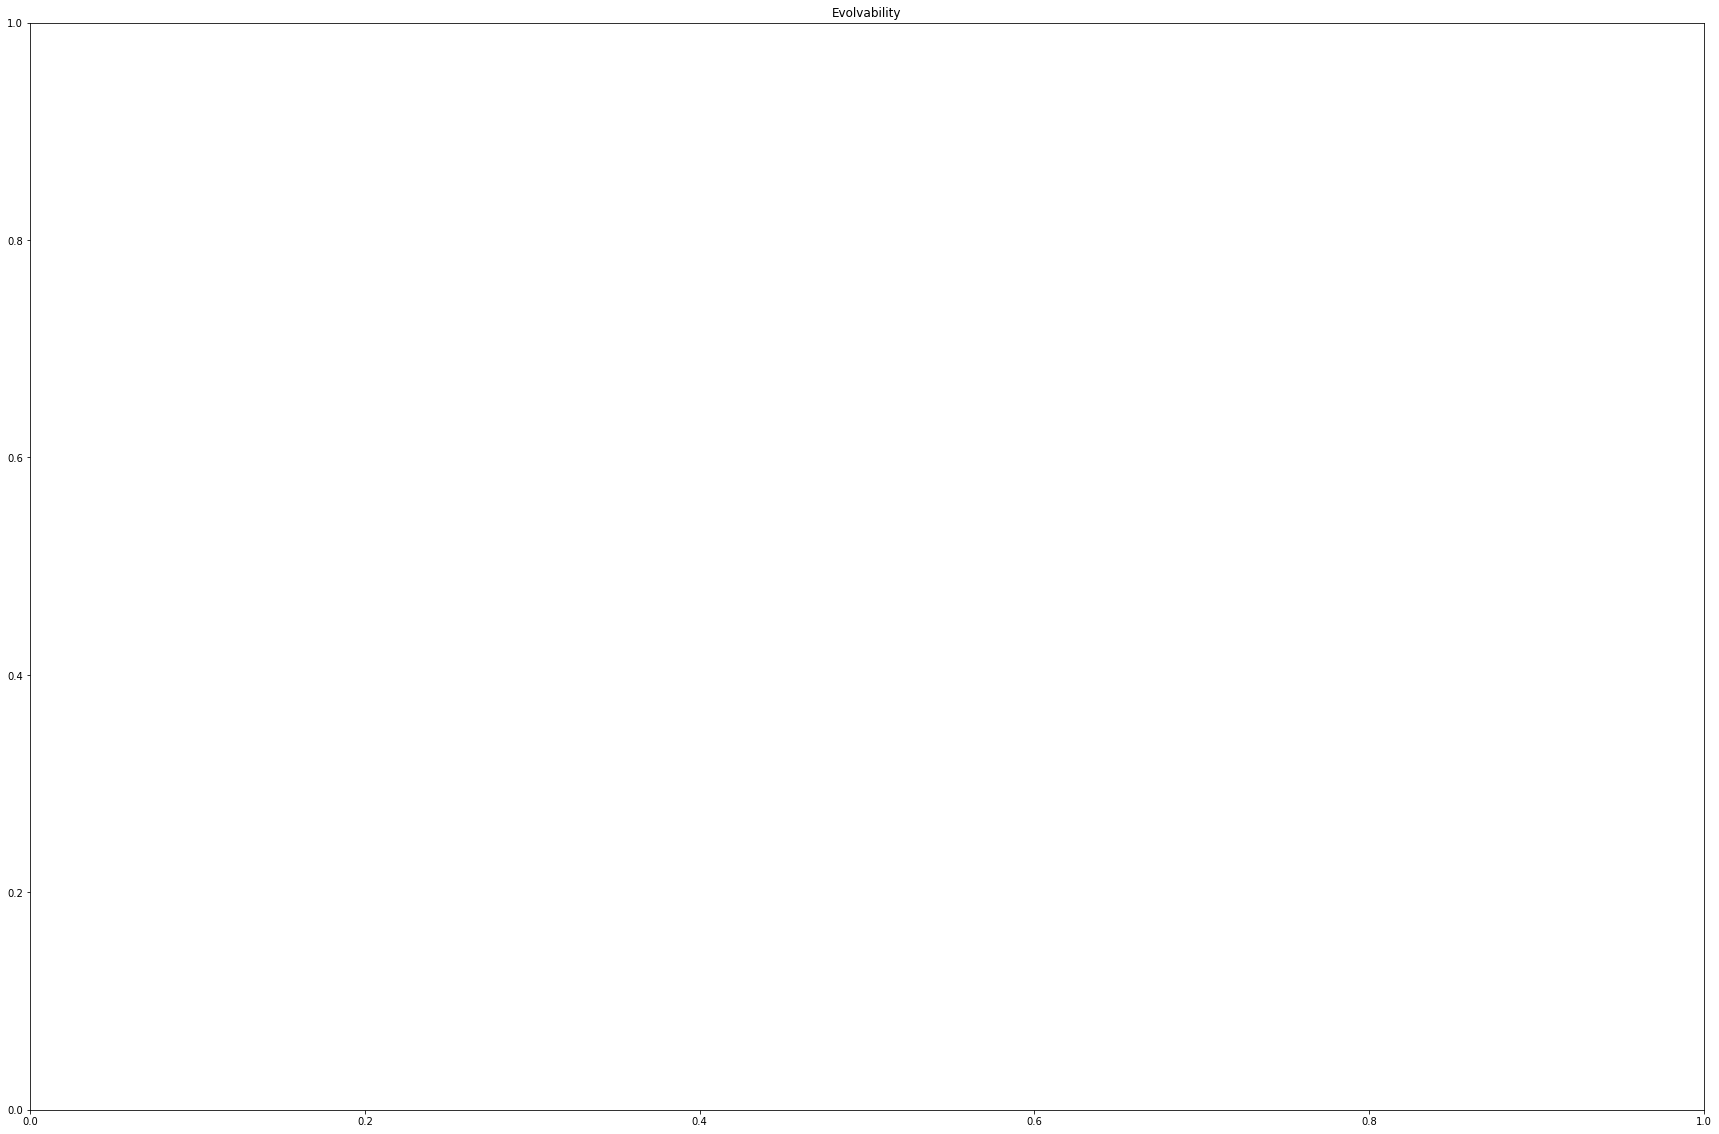

In [6]:
# Create evolvability figure
fig_evolvability = plt.figure(figsize=(30,20))
ax_evolv = fig_evolvability.add_subplot(111)
ax_evolv.set_title("Evolvability")

df_seed01_control_robustness.fillna(value=0, inplace=True)
df_seed02_control_robustness.fillna(value=0, inplace=True)
df_seed01_control_evolvability = df_seed01_control_robustness['frac_positive_offspring'] * df_seed01_control_robustness['cumul_delta-gap_positive_offspring']

print(df_seed01_control_robustness['frac_positive_offspring'])

In [4]:
print(df_seed01_control_evolvability)

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
969   NaN
970   NaN
971   NaN
972   NaN
973   NaN
Length: 974, dtype: float64
